### EDA of Credit Fraud Risk Modeling

**Exploratory Data Analysis (EDA)** helps to visualize the dataset to determine how best to manipulate the data sources to get the answers that we need, ensuring the best outcomes for the project. It is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set. 

In this project, we did a preliminary analysis of the dataset to discover and gain an insight on the trends, patterns, and relationships among the various entities present in the dataset with the help of visualization tools such as matplotlinb and seaborn.

We did a **univariate analysis** for the categorical and numerical features in the dataset to visualize the following:
- The percentages of fraud and non-fraud dataset.
- Identify the seasonality trends in fraudulent accounts.
- Explore whether the fraud rates have trended up or down over time.
- Explore and identify differences in the fraud rate between different products offered by the company.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

The fraud risk dataset is very large with 19030 rows and 2330 columns. The Experian Dictionary is a data dictionary that accompanies the fraud risk data set. This document provides a description of what the columns represent. The dataset the columns are represented by arbitraty letters and numbers. Among these 2330 variables there are many that are similar to one another, for instance ALL0416 represents "Total number of open trades reported in the last 6 months" while ALL0436 represents "Total number of open trades opened in the last 6 months".  

In [5]:
df_credit = pd.read_csv('fraud_risk_dataset.csv', header=0,index_col=0)
df_credit.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


The dataset has 19030 observations and 2329 variables including the target divided into 1493 int variables and 836 float variables

In [6]:
df_credit.dtypes

portfolio_id                   int64
product_term_credit_limit      int64
NP                             int64
cash_intent                    int64
ALJ0300                        int64
                              ...   
TSTU3907                     float64
TSTU3908                     float64
TSTU4906                     float64
TSTU4907                     float64
TSTU4908                     float64
Length: 2329, dtype: object

In [7]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 1 to 19030
Columns: 2329 entries, portfolio_id to TSTU4908
dtypes: float64(836), int64(1493)
memory usage: 338.3 MB
None


In [8]:
print(df_credit.nunique())

portfolio_id                 17
product_term_credit_limit     4
NP                            2
cash_intent                   2
ALJ0300                      30
                             ..
TSTU3907                     12
TSTU3908                     12
TSTU4906                      6
TSTU4907                     20
TSTU4908                     20
Length: 2329, dtype: int64


# Checking for null values

This ensures that we have a 100% clean dataset before processing and plugging into modelling 

The following code shows the total number of missing values in each column of the DataFrame. There are 836 columns having 2 rows of missing data which sums up to 1672 total missing values in the dataset

In [9]:
df_credit.isnull().sum().sum()

1672

### Count the Total Missing Values per Column

In [10]:
nulval = df_credit.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
portfolio_id,0,0.00
product_term_credit_limit,0,0.00
NP,0,0.00
cash_intent,0,0.00
ALJ0300,0,0.00
...,...,...
TSTU3907,2,0.12
TSTU3908,2,0.12
TSTU4906,2,0.12
TSTU4907,2,0.12


In [11]:
data = df_credit[['portfolio_id','product_term_credit_limit','NP','cash_intent']].copy()

## Visualizing the continuous numeric data

In [30]:
#Description of the credit bureau attributes based on the valid values and units

# $
# 0-999999990 - 'ALJ5030','ALJ5320','ALJ5730','ALJ5820','ALJ5830','ALL5012','ALL5015','ALL5018','ALL5020','ALL5030','ALL5040','ALL5042','ALL5043','ALL5045','ALL5047','ALL5048','ALL5070','ALL5071','ALL5072','ALL5073','ALL5074','ALL5075','ALL5120','ALL5301','ALL5320','ALL5321','ALL5360','ALL5361','ALL5420','ALL5460','ALL5461','ALL5740','ALL5742','ALL5743','ALL5747','ALL5770','ALL5820','ALL5825','ALL5830','ALL5835','ALL5935','ALL9330','ALL9340','ALL9380','ALM5072','ALM5074','ALS5400','ALX5020','ALX5030','ALX5039','ALX5830','ALX5839','AUA5020','AUA5320','AUA5400','AUA5420','AUA5421','AUA5520','AUA5820','AUL5020','AUL5120','AUL5122','AUL5320','AUL5420','AUL5820','AUT5020','AUT5120','AUT5122','AUT5238','AUT5320','AUT5420','AUT5620','AUT5820','AUT5838','AUT5923','AUT5926','AUT5930','BAX5020','BAX5030','BCA5020','BCA5021','BCA5028','BCA5030','BCA5040','BCA5043','BCA5047','BCA5070','BCA5121','BCA5122','BCA5130','BCA5137','BCA5138','BCA5430','BCA5431','BCA5740','BCA5743','BCA5747','BCA5770','BCC5020','BCC5030','BCC5038','BCC5120','BCC5122','BCC5227','BCC5228','BCC5238','BCC5239','BCC5320','BCC5400','BCC5420','BCC5421','BCC5422','BCC5423','BCC5427','BCC5520','BCC5620','BCC5627','BCC5820','BCC5830','BCC5838','BCC5920','BCC5930','BCN5020','BCN5030','BCN5038','BCN5238','BCN5239','BCN5838','BCN5930','BCX5020','BCX5030','BCX5320','BCX5420','BCX5830','BRC5020','BRC5030','BRC5038','BRC5220','BRC5238','BRC5239','BRC5320','BRC5620','BRC5747','BRC5830','BRC5838','BRC5930','BUS5020','BUS5120','COL5060','COL5062','COL5063','COL5064','COL5066','COL5067','COL5068','COL5069','CRU5030','CRU5320','FIP5020','FIP5120','FIP5320','FIP5420','FIP5520','FIP5820','HLC5020','HLC5021','HLC5030','HLC5120','HLC5122','HLC5220','HLC5238','HLC5320','HLC5420','HLC5422','HLC5520','HLC5620','HLC5820','HLC5830','HLC5838','HLC5930','ILJ5030','ILJ5320','ILJ5820','ILN5020','ILN5040','ILN5043','ILN5047','ILN5070','ILN5120','ILN5122','ILN5220','ILN5238','ILN5320','ILN5400','ILN5420','ILN5422','ILN5520','ILN5740','ILN5743','ILN5747','ILN5770','ILN5820','ILN5823','ILN5824','ILN5838','ILN5923','ILN5926','ILN5930','MFX5029','MFX5829','MTA5020','MTA5030','MTA5040','MTA5043','MTA5047','MTA5070','MTA5121','MTA5320','MTA5400','MTA5420','MTA5421','MTA5422','MTA5740','MTA5742','MTA5743','MTA5747','MTA5770','MTA5830','MTF5020','MTF5022','MTF5023','MTF5080','MTF5081','MTF5082','MTF5083','MTF5100','MTF5121','MTF5122','MTF5124','MTF5125','MTF5128','MTF5129','MTF5220','MTF5238','MTF5320','MTF5322','MTF5323','MTF5351','MTF5352','MTF5353','MTF5354','MTF5355','MTF5356','MTF5357','MTF5358','MTF5420','MTF5421','MTF5422','MTF5428','MTF5429','MTF5620','MTF5820','MTF5838','MTF5930','MTJ5030','MTJ5320','MTJ5730','MTJ5820','MTS5020','MTS5120','MTS5122','MTS5320','MTS5420','MTS5422','MTS5620','MTS5820','MTX5039','MTX5839','PIL5020','PIL5320','REC5020','REC5120','REH5020','REH5030','REH5120','REH5320','REH5420','REH5820','REH5830','REJ5030','REJ5320','REJ5820','REJ5830','REV5002','REV5020','REV5030','REV5032','REV5036','REV5040','REV5043','REV5047','REV5070','REV5320','REV5324','REV5420','REV5620','REV5627','REV5740','REV5742','REV5743','REV5747','REV5770','REV5830','RPM5020','RPM5320','RPM5820','RTA5030','RTA5120','RTA5320','RTA5830','RTI5020','RTI5320','RTI5820','RTR5020','RTR5030','RTR5038','RTR5227','RTR5228','RTR5320','RTR5420','RTR5520','RTR5620','RTR5627','RTR5830','RTR5920','RTR5930','STU5020','STU5031','STU5092','STU5120','STU5123','STU5127','STU5320','STU5327','STU5420','STU5424','STU5820','USE5030','USE5320','UTI5030','TBCA2201','TBCA2251','TBCA2252','TBCA2253','TBCA2256','TBCA2257','TBCA2279','TBCA2358','TBCA3201','TBCA3251','TBCA3252','TBCA3253','TBCA3256','TBCA3257','TBCA3267','TBCA3279','TBCA3358','TBCA3402','TBCA3404','TBCC1201','TBCC2201','TBCC2251','TBCC2256','TBCC3201','TBCC3251','TBCC3256','TBCC4201','THLC1201','THLC2201','THLC3201','THLC4201','TRTR1201','TRTR3201','TRTR3251','TRTR3252','TRTR3253','TRTR3256','TRTR3257','TRTR3402','TRTR3404','TRTR4201','TAUT0905','TAUT2902','TAUT2903','TAUT3902','TAUT3903','TAUT4902','TAUT4903','TBCA0910','TBCA2902','TBCA2903','TBCA2907','TBCA2908','TBCA3902','TBCA3903','TBCA3907','TBCA3908','TBCA4902','TBCA4903','TBCA4907','TBCA4908','TMTI2902','TMTI2903','TMTI3902','TMTI3903','TMTI4902','TMTI4903','TPIL0905','TPIL0925','TPIL2902','TPIL2903','TPIL2922','TPIL2923','TPIL3902','TPIL3903','TPIL3922','TPIL3923','TPIL4902','TPIL4903','TPIL4922','TPIL4923','TSTU0910','TSTU2907','TSTU2908','TSTU3907','TSTU3908','TSTU4907','TSTU4908','TAUA4708','TBCA2255','TBCA2260','TBCA2267','TBCA2273','TBCA2274','TBCA2275','TBCA3255','TBCA3260','TBCA3273','TBCA3274','TBCA3275','TBCC4255','TMTI4708','TPIL4708','TRTR3255','TRTR3260','TRTR3267','TRTR3274','TRTR3358','TCOL2552','TCOL2554','TCOL2562','TCOL2564','TCOL2572','TCOL2582','TCOL2592','TCOL3552','TCOL3554','TCOL3562','TCOL3564','TCOL3572','TCOL3582','TCOL3592','TBCA0964','TBCA2961','TBCA2962','TBCA3961','TBCA3962','TBCA4961','TBCA4962','TMTI0905','TPIL0984','TPIL2981','TPIL2982','TPIL3981','TPIL3982','TPIL4981','TPIL4982','TAUA0452','TAUA0454','TBCA0452','TBCA0454','TBCA0456','TBCA0458','TMTI0452','TMTI0454','TMTI0456','TMTI0458','TAMP2701','TAMP2702','TAMP3701','TAMP3702','TAUA2701','TAUA2702','TAUA3701','TAUA3702','TBCA2623','TBCA3623','TBCC1751','TBCC1752','TBCC1753','TBCC2751','TBCC2752','TBCC2753','TBCC3751','TBCC3752','TBCC3753','THLC1751','THLC1752','THLC1753','THLC2751','THLC2752','THLC2753','THLC3751','THLC3752','THLC3753','TMTI2701','TMTI2702','TMTI3701','TMTI3702','TPIL2701','TPIL2702','TPIL3701','TPIL3702','TRTR1751','TRTR1752','TRTR1753','TRTR2751','TRTR2752','TRTR2753','TRTR3623','TRTR3751','TRTR3752','TRTR3753','TBCA2602','TBCA2603','TBCA2604','TBCA2607','TBCA2608','TBCA2609','TBCA2611','TBCA2612','TBCA2613','TBCA2614','TBCA2622','TBCA2626','TBCA2627','TBCA3603','TBCA3604','TBCA3608','TBCA3609','TBCA3622','TBCA3626','TBCA3627','TRTR2602','TRTR2603','TRTR2604','TRTR2611','TRTR2613','TRTR3602','TRTR3603','TRTR3604','TRTR3622','TBCA2526','TBCA2527','TBCA3526','TBCA3527','TRTR2201','TRTR3526'
# -99999990-999999990 - 'TCOL2561','TCOL2571','TCOL2581','TCOL2591','TCOL3561','TCOL3571','TCOL3581','TCOL3591','TRTR4501'
# -999999990-0 - 'TAUA2711','TAUA3711','TBCC4260','TMTI2711','TMTI3711','TPIL2711','TPIL3711','TCOL2555','TCOL2565','TCOL3555','TCOL3565'
# -999999990-999999990 - 'TBCC1203','TBCC1261','TBCC2203','TBCC2261','TBCC2501','TBCC3203','TBCC3261','TBCC3501','TBCC4203','THLC1203','THLC1261','THLC2203','THLC2261','THLC3203','THLC3261','THLC4203','TRTR1203','TRTR1261','TRTR2203','TRTR2261','TRTR3203','TRTR3261','TRTR4203','TCOL2551','TCOL3551','TAMP2703','TAMP3703','TAUA2703','TAUA3703','TMTI2703','TMTI3703','TPIL2703','TPIL3703','TBCA2601','TBCA2606','TBCA3601','TBCA3602','TBCA3606','TBCA3607','TRTR2601','TRTR3601','TBCC1501','TBCC4501','THLC1501','THLC2501','THLC3501','THLC4501','TRTR1501','TRTR2501','TRTR3501'

# %
#0-100 - 'ALL7310','ALL7311','ALL7312','ALL7320','ALL7330','ALL7331','ALL7332','ALL7333','ALL7334','ALL7336','ALL7337','ALL7338','ALL7340','ALL7346','ALL7347','ALL7348','ALL7350','ALL7358','ALL7360','ALL7370','ALL7440','ALL7442','ALL7443','ALL7444','ALL7450','ALL7454','ALL7460','ALL7470','ALL7516','ALL7517','ALL7518','ALL7519','ALL7936','ALL7937','ALL7938','BCA7300','BCA7600','BCC7433','BCC7437','BCC7440','BCC7450','BCC7460','BCC7470','BCC7481','BCC7482','BCC7483','BCC7516','BCC7517','BCC7518','BCC7592','BCC7610','BCC7620','BCC7700','BCC7707','BCC7708','BCC7910','BCC7911','BCN7592','BRC7517','BRC7591','BRC7592','ILN7300','ILN7310','ILN7313','ILN7410','ILN7430','ILN7432','ILN7433','ILN7434','ILN7436','ILN7437','ILN7438','ILN7440','ILN7450','ILN7460','ILN7470','MTA7410','MTA7430','MTA7432','MTA7433','MTA7434','MTA7436','MTA7437','MTA7438','MTA7440','MTA7450','MTA7460','MTA7470','REV7410','REV7420','REV7430','REV7432','REV7433','REV7434','REV7436','REV7437','REV7438','REV7440','REV7442','REV7443','REV7446','REV7447','REV7450','REV7460','REV7470','RTA7300','RTR7610','RTR7620'
#0-110 - 'TBCA2631','TBCA3631'
#0-990 - 'ALL7110','ALL7111','ALL7113','ALL7115','ALL7116','ALL7120','ALL7130','ALL7140','ALL7170','AUA7201','AUT7110','BCA7211','BCA7212','BCA7213','BCA7214','BCC7110','BCC7117','BCC7120','BCC7130','BCC7140','BCC7147','BCC7150','BCC7160','BCC7200','BCC7216','BCC7228','BCN7150','BCN7160','BCX7110','BRC7140','BRC7150','BRC7160','BRC7180','BRC7190','BUS7110','BUS7130','HLC7110','HLC7117','HLC7130','HLC7150','HLC7180','ILN7110','ILN7120','ILN7130','ILN7150','IQT9846','MTF7110','MTF7150','MTS7110','MTS7130','REC7110','REC7130','REH7110','REH7120','REV7110','REV7112','REV7114','REV7140','RPM7110','RTA7110','RTR7110','RTR7140','RTR7150','RTR7160','RTR7216','RTR7228','STU7110','STU7118','TBCA2282','TBCA2283','TBCA3282','TBCA3283','TRTR3282','TBCA2610','TBCA2615','TBCA2616','TBCA2619','TBCA2620','TBCA2628','TBCA2629','TBCA3610','TBCA3619','TBCA3620','TBCA3628','TBCA3629','TRTR2610','TRTR2615','TRTR3610','TRTR3619','TRTR3620','TBCA2301','TBCA2379','TBCA3301','TBCA3379','TBCC1301','TBCC2301','TBCC2351','TBCC2356','TBCC3301','TBCC3351','TBCC3356','TBCC4301','TRTR2301','TRTR3301','TBCC4355'
#-990-0 - 'TBCC4360'
#-990-990 - 'TBCC1303','TBCC1314','TBCC2314','TBCC2303','TBCC3303','TBCC3314','TBCC4303','TBCC4314'

#Days
#0-990- 'ALL8423','ALL8425','ALL8426','ALL8723','ALL8725','ALL8726','IQT9523','IQT9525','IQT9526','IQT9533','IQT9535','IQT9536'
#0-9990- 'IQA9540','IQB9540','IQF9540','IQM9540','IQP9540','IQR9540'
#0-99990- 'AUL8132','AUT8132','BCC8132','BUS8132','HLC8132','MTF8132','MTS8132','PIL8132','REC8132','RTA8132','STU8132'

#Flag
#0-1 Flag- 'ALL9950','ALL9951','GLBDECS' -included in categorical except for 'GLBDECS'

#Inquiries
#0-90 Inquiries - 'IQA9410','IQA9415','IQA9416','IQA9417','IQA9426','IQA9427','IQB9410','IQB9415','IQB9416','IQB9417','IQC9410','IQC9415','IQC9416','IQC9417','IQF9410','IQF9415','IQF9416','IQF9417','IQM9410','IQM9415','IQM9416','IQM9417','IQR9410','IQR9415','IQR9416','IQR9417','IQT9410','IQT9412','IQT9413','IQT9415','IQT9416','IQT9417','IQT9420','IQT9421','IQT9422','IQT9423','IQT9425','IQT9426','IQT9427'

#months
#0-6 months- 'TBCA2265','TBCA2266','TBCA2271','TAUA2712','TBCA2263','TBCA2264','TBCA2276','TBCA2277','TBCA2278','TBCC2204','TBCC2205','TBCC2206','TBCC2207','TBCC2208','TBCC2209','TBCC2210','TBCC2211','TBCC2212','TBCC2213','TMTI2712','TPIL2712','TCOL2556','TCOL2557','TCOL2566','TCOL2567','TBCC2365','TBCC2366','TBCC2304','TBCC2305','TBCC2306','TBCC2307','TBCC2308','TBCC2309','TBCC2310','TBCC2311','TBCC2312','TBCC2313'
#0-3 months-'TBCC1204','TBCC1205','TBCC1206','TBCC1207','TBCC1208','TBCC1209','TBCC1210','TBCC1211','TBCC1212','TBCC1213','TBCC1304','TBCC1305','TBCC1306','TBCC1307','TBCC1308','TBCC1309','TBCC1310','TBCC1311','TBCC1312','TBCC1313'
#0-12 months - 'TBCA3265','TBCA3266','TBCA3269','TBCA3270','TBCA3271','TRTR3265','TRTR3269','TAUA3712','TBCA3263','TBCA3264','TBCA3276','TBCA3277','TBCA3278','TBCC3204','TBCC3205','TBCC3206','TBCC3207','TBCC3208','TBCC3209','TBCC3210','TBCC3211','TBCC3212','TBCC3213','TMTI3712','TPIL3712','TRTR3264','TRTR3277','TCOL3553','TCOL3556','TCOL3557','TCOL3563','TCOL3566','TCOL3567','TCOL3573','TCOL3583','TCOL3593','TBCC3365','TBCC3366','TBCC3304','TBCC3305','TBCC3306','TBCC3307','TBCC3308','TBCC3309','TBCC3310','TBCC3311','TBCC3312','TBCC3313'
#0-13 - 'BCC8337'
#1-12 months- 'TBCA3401','TBCA3403','TRTR3401','TRTR3403'
#0-24 months - 'TAUT0904','TBCA0904','TBCA0909','TMTI0904','TPIL0904','TPIL0924','TSTU0909','TAMP4710','TAUA4709','TAUA4710','TBCA4280','TBCA4281','TBCC4204','TBCC4205','TBCC4206','TBCC4207','TBCC4208','TBCC4209','TBCC4210','TBCC4211','TBCC4212','TBCC4213','TBCC4263','TBCC4264','TMTI4709','TMTI4710','TPIL4709','TPIL4710','TRTR4280','TRTR4281','TBCA0963','TPIL0983','TBCC4304','TBCC4305','TBCC4306','TBCC4307','TBCC4308','TBCC4309','TBCC4310','TBCC4311','TBCC4312','TBCC4313','TBCC4363','TBCC4364'
#0-25  months -'BCC8338'
#0-90 months - 'ALL4520','ALL8171','ALL8172','ALL8271','ALL8272'
#0-990 months - 'ALL4018','ALL4028'
#0-9990 months - 'ALJ8120','ALJ8220','ALL8107','ALL8110','ALL8120','ALL8121','ALL8122','ALL8123','ALL8150','ALL8151','ALL8152','ALL8153','ALL8154','ALL8155','ALL8157','ALL8158','ALL8160','ALL8162','ALL8163','ALL8164','ALL8167','ALL8170','ALL8183','ALL8220','ALL8221','ALL8222','ALL8223','ALL8225','ALL8250','ALL8253','ALL8257','ALL8259','ALL8270','ALL8320','ALL8321','ALL8323','ALL8325','ALL8351','ALL8352','ALL8353','ALL8354','ALL8355','ALL8358','ALL8370','ALL8552','ALL8555','ALL8558','ALL8560','ALL8800','ALL9210','ALL9211','ALL9219','ALL9220','ALL9221','ALL9222','ALL9223','ALL9226','ALL9229','ALL9230','ALL9239','ALL9240','ALL9249','ALL9250','ALL9260','ALL9280','ALS8220','ALX8220','AUA8120','AUA8122','AUA8151','AUA8220','AUA8320','AUA8370','AUA8811','AUA8820','AUL8120','AUL8122','AUL8140','AUL8220','AUL8222','AUT8120','AUT8122','AUT8140','AUT8220','AUT8222','BCA8110','BCA8120','BCA8122','BCA8150','BCA8151','BCA8153','BCA8155','BCA8157','BCA8160','BCA8220','BCA8222','BCA8320','BCA8370','BCC8120','BCC8122','BCC8220','BCC8222','BCC8320','BCC8322','BCN8120','BCN8220','BRC8120','BRC8151','BRC8158','BRC8220','BRC8320','BUS8122','COL8165','COL8168','COL8190','COL8191','COL8192','COL8193','COL8194','COL8195','COL8196','COL8197','COL8198','COL8199','CRU8151','CRU8320','FIP8120','FIP8220','FIP8320','HLC8120','HLC8122','HLC8220','HLC8222','HLC8320','ILJ8120','ILJ8220','ILN8120','ILN8140','ILN8150','ILN8151','ILN8152','ILN8153','ILN8155','ILN8157','ILN8160','ILN8220','ILN8222','ILN8320','IQA9510','IQB9510','IQF9510','IQM9510','IQP9510','IQR9510','IQT9510','MTA8120','MTA8150','MTA8151','MTA8153','MTA8157','MTA8160','MTA8220','MTA8320','MTA8370','MTF8111','MTF8120','MTF8122','MTF8128','MTF8129','MTF8140','MTF8141','MTF8151','MTF8166','MTF8169','MTF8220','MTF8222','MTF8320','MTF8810','MTJ8120','MTJ8220','MTS8120','MTS8122','MTS8151','MTS8220','MTS8222','MTS8320','PIL8120','PIL8220','REC8122','REH8120','REH8127','REH8220','REH8227','REJ8120','REJ8220','REV8120','REV8150','REV8151','REV8153','REV8157','REV8160','REV8220','REV8320','RPM8100','RPM8220','RTA8120','RTA8122','RTA8151','RTA8320','RTR8120','RTR8220','RTR8320','STU8120','STU8122','STU8125','STU8142','STU8151','STU8220','STU8228','STU8320','USE8220','UTI8151','UTI8320'
#0-999990 months- 'ALL8020', 'ALL8026'
#0-999999990 months- 'BCC7800','BCC7801','REV7800','REV7801'

#Occurrences
#0-90 Occurrences - 'TAUT0901','TAUT2901','TAUT3901','TAUT4901','TBCA0906','TBCA2901','TBCA2906','TBCA3901','TBCA3906','TBCA4901','TBCA4906','TMTI0901','TMTI2901','TMTI3901','TMTI4901','TPIL0901','TPIL0921','TPIL2901','TPIL2921','TPIL3901','TPIL3921','TPIL4901','TPIL4921','TSTU0906','TSTU2906','TSTU3906','TSTU4906','TBCA2960','TBCA3960','TBCA4960','TPIL2980','TPIL3980','TPIL4980'
#0-990 Occurrences - 'ALL4000','ALL4001','ALL4060','ALL4070','ALL4080','ALL4090','ALL4100','ALL4160','ALL4170','ALL4180','ALL4190','ALL4300','ALL4360','ALL4370','ALL4380','ALL4390','ALL4400','ALL4460','ALL4470','ALL4480','ALL4490','ALL4600','ALL4660','ALL4670','ALL4680','ALL4690','ALL4700','ALL4760','ALL4770','ALL4780','ALL4790','AUL4180','AUT4180','BCA4180','BCC4070','BCC4080','BCC4380','BCC4780','BRC4180','CRU4180','ILN4070','ILN4080','ILN4370','ILN4380','ILN4770','ILN4780','MTA4070','MTA4080','MTA4370','MTA4380','MTA4770','MTA4780','MTF4170','MTF4180','MTF4250','MTF4260','MTF4270','MTF4470','MTF4480','MTF4550','MTF4560','MTF4570','MTF4770','MTF4780','MTF4850','MTF4860','MTF4870','MTS4180','REV4070','REV4080','REV4170','REV4370','REV4380','REV4770','REV4780','RTA4180','RTI4180','STU4180','UTI4180','TBCA4103','TBCA4104','TRTR4103','TRTR4104'
#0-9990 Occurrences -'TBCC1502','TBCC2502','TBCC3502','TBCC4502','THLC1502','THLC2502','THLC3502','THLC4502','TRTR1502','TRTR2502','TRTR3502','TRTR4502'

#Public Records
#0-90 -'ALL9110','ALL9118','ALL9120','ALL9121','ALL9122','ALL9123','ALL9124','ALL9125','ALL9128','ALL9130','ALL9134','ALL9135','ALL9138','ALL9139','ALL9140','ALL9141','ALL9144','ALL9145','ALL9148','ALL9149','ALL9150','ALL9160','ALL9171','ALL9177','ALL9178','ALL9180','ALL9187','ALL9188','ALL9189'

#Rank 
#1-9 Rank -'ALL6310', 'ALL6320' - included in categorical
#1-3 Rank -'MTF6326' - included in categorical
#0-400 Rank-'ALL6100','ALL6120','ALL6160','ALL6190','ALL6200','ALL6203','ALL6210','ALL6220','ALL6230','ALL6250','ALL6270','ALL6280','ALL6400','ALL6460','ALL6500','ALL6600','ALL6700','ALL6800','ALL6900','ALL6901','ALL6970','ALL6971','ALL6980','ALL6981','ALM6160','ALM6169','ALM6200','ALM6209','ALM6270','ALM6279','ALM6280','ALM6289','AUA6160','AUA6200','AUA6280','BCA6200','BCA6201','BCA6204','BCA6210','BCA6220','BCA6280','BCC6160','BCC6200','BCC6280','BRC6160','BRC6200','BRC6280','CRU6200','CRU6280','FIP6200','FIP6280','HLC6201','ILN6160','ILN6200','ILN6210','ILN6220','ILN6230','ILN6270','ILN6280','MTA6160','MTA6200','MTA6210','MTA6220','MTA6230','MTA6270','MTA6280','MTF6200','MTF6243','MTF6244','MTF6245','MTF6246','MTF6247','MTF6280','MTF6281','MTF6282','MTS6200','MTS6280','PIL6200','REV6160','REV6200','REV6210','REV6220','REV6230','REV6270','REV6280','RPM6160','RPM6200','RTA6200','RTA6280','RTR6200','RTR6280','STU6200','STU6280','UTI6200','UTI6280'

#trades
#0-90 trades- 'ALJ0300','ALJ0316','ALJ0416','ALL0000','ALL0060','ALL0061','ALL0100','ALL0101','ALL0102','ALL0133','ALL0135','ALL0136','ALL0200','ALL0201','ALL0206','ALL0216','ALL0217','ALL0218','ALL0300','ALL0302','ALL0303','ALL0305','ALL0306','ALL0316','ALL0317','ALL0318','ALL0336','ALL0337','ALL0400','ALL0416','ALL0436','ALL0437','ALL0438','ALL0439','ALL0446','ALL0448','ALL0700','ALL0716','ALL0726','ALL0900','ALL1300','ALL1302','ALL1303','ALL1306','ALL1360','ALL1361','ALL1370','ALL1371','ALL1380','ALL1401','ALL1760','ALL2000','ALL2001','ALL2002','ALL2003','ALL2004','ALL2005','ALL2006','ALL2008','ALL2009','ALL2011','ALL2012','ALL2106','ALL2116','ALL2120','ALL2126','ALL2136','ALL2146','ALL2166','ALL2176','ALL2196','ALL2201','ALL2202','ALL2206','ALL2216','ALL2220','ALL2226','ALL2300','ALL2306','ALL2307','ALL2308','ALL2309','ALL2320','ALL2321','ALL2322','ALL2326','ALL2327','ALL2328','ALL2330','ALL2336','ALL2337','ALL2338','ALL2339','ALL2350','ALL2351','ALL2352','ALL2356','ALL2357','ALL2358','ALL2360','ALL2366','ALL2367','ALL2368','ALL2369','ALL2380','ALL2386','ALL2387','ALL2388','ALL2420','ALL2421','ALL2422','ALL2423','ALL2427','ALL2428','ALL2450','ALL2456','ALL2457','ALL2458','ALL2480','ALL2486','ALL2487','ALL2488','ALL2700','ALL2702','ALL2703','ALL2704','ALL2706','ALL2707','ALL2708','ALL2800','ALL2830','ALL2831','ALL2840','ALL2841','ALL2870','ALL2874','ALL2875','ALL2880','ALL2900','ALL2906','ALL2907','ALL2908','ALL2910','ALL2916','ALL2917','ALL2918','ALL2919','ALL2930','ALL2936','ALL2937','ALL2938','ALL2940','ALL2946','ALL2947','ALL2948','ALL2949','ALL2960','ALL2966','ALL2967','ALL2968','ALL2970','ALL2976','ALL2977','ALL2978','ALL2979','ALL2990','ALL2996','ALL2997','ALL2998','ALL2999','ALL3110','ALL3202','ALL3311','ALL3410','ALL3412','ALL3446','ALL3510','ALL3517','ALL4980','ALM0201','ALM2001','ALM2002','ALM2320','ALM2329','ALM2350','ALM2359','ALM2380','ALM2389','ALM2700','ALM2709','ALS0000','ALS0001','ALS0337','ALS1300','ALS2000','ALS3215','ALX0436','ALX3510','AUA0300','AUA0416','AUA0426','AUA0436','AUA0437','AUA0438','AUA1300','AUA1305','AUA1380','AUA2320','AUA2328','AUA2350','AUA2358','AUA2388','AUA2800','AUL0300','AUL0416','AUL0436','AUL0700','AUL2000','AUT0300','AUT0416','AUT0436','AUT0700','AUT2000','BAX0416','BAX0436','BAX3510','BCA0300','BCA0400','BCA0401','BCA0416','BCA0436','BCA1300','BCA2350','BCA2358','BCA2380','BCA2388','BCA3510','BCA3511','BCC0300','BCC0316','BCC0317','BCC0318','BCC0400','BCC0416','BCC0436','BCC0437','BCC0438','BCC0446','BCC0700','BCC1300','BCC1360','BCC1370','BCC1380','BCC1401','BCC2000','BCC2306','BCC2307','BCC2308','BCC2320','BCC2326','BCC2327','BCC2328','BCC2336','BCC2337','BCC2338','BCC2350','BCC2356','BCC2357','BCC2358','BCC2366','BCC2367','BCC2368','BCC2380','BCC2386','BCC2387','BCC2388','BCC2391','BCC2607','BCC2687','BCC2688','BCC2800','BCC2900','BCC2930','BCC3110','BCC3341','BCC3342','BCC3343','BCC3344','BCC3345','BCC3346','BCC3410','BCC3421','BCC3422','BCC3423','BCC3424','BCC3448','BCC3449','BCC3456','BCC3476','BCC3480','BCC3485','BCC3510','BCC3511','BCC3512','BCC3515','BCN0300','BCN3480','BCN3485','BCX0416','BCX0436','BCX0438','BCX1300','BCX3421','BCX3422','BCX3423','BCX3510','BRC0300','BRC0400','BRC0416','BRC0437','BRC1300','BRC2000','BRC2328','BRC2358','BRC2388','BRC2800','BRC3425','BRC3480','BRC3481','BRC3485','BRC3510','BUS0416','COL2740','COL2750','COL2757','COL2758','COL2760','COL2762','COL2763','COL2764','COL2766','COL2767','COL2768','COL2770','COL2780','COL2790','COL3200','COL3201','COL3203','COL3204','COL3206','COL3207','COL3208','COL3209','COL3210','COL3211','COL3212','COL3217','COL3218','COL3219','COL3230','COL3236','COL3237','COL3238','COL3240','COL3242','COL3243','COL3244','CRU0300','CRU0416','CRU0436','CRU1300','CRU2388','FIP0300','FIP0416','FIP0436','FIP0437','FIP0438','FIP1300','FIP1380','FIP2000','FIP2320','FIP2328','FIP2350','FIP2358','FIP2380','FIP2388','FIP2800','HLC0300','HLC0401','HLC0402','HLC0416','HLC0436','HLC0437','HLC0438','HLC0700','HLC1402','HLC2000','HLC2156','HLC2320','HLC2328','HLC2358','HLC2388','HLC3410','HLC3482','HLC3483','HLC3485','ILJ0300','ILJ0316','ILJ0416','ILN0300','ILN0316','ILN0317','ILN0318','ILN0403','ILN0416','ILN0426','ILN0436','ILN0437','ILN0438','ILN1300','ILN1360','ILN1370','ILN1380','ILN1401','ILN2000','ILN2106','ILN2126','ILN2136','ILN2176','ILN2206','ILN2320','ILN2326','ILN2327','ILN2328','ILN2350','ILN2356','ILN2357','ILN2358','ILN2380','ILN2386','ILN2387','ILN2388','ILN2800','ILN3110','ILN3484','MTA0300','MTA0304','MTA0316','MTA0317','MTA0318','MTA0400','MTA0416','MTA0436','MTA0437','MTA0438','MTA0700','MTA0702','MTA1300','MTA1304','MTA1360','MTA1370','MTA1380','MTA2000','MTA2106','MTA2126','MTA2136','MTA2176','MTA2206','MTA2320','MTA2326','MTA2327','MTA2328','MTA2350','MTA2356','MTA2357','MTA2358','MTA2380','MTA2386','MTA2387','MTA2388','MTA2800','MTF0153','MTF0154','MTF0155','MTF0156','MTF0157','MTF0300','MTF0416','MTF0436','MTF0471','MTF0476','MTF0481','MTF0486','MTF0700','MTF1300','MTF1471','MTF1472','MTF2000','MTF2146','MTF2156','MTF2176','MTF2196','MTF2320','MTF2350','MTF2358','MTF2380','MTF2388','MTF2860','MTF2861','MTF2862','MTF2863','MTF2864','MTF2867','MTF2868','MTF2930','MTF2933','MTF2934','MTF2935','MTF2936','MTF2960','MTF2963','MTF2974','MTF2975','MTF2976','MTF3485','MTJ0300','MTJ0316','MTJ0416','MTS0300','MTS0416','MTS0436','MTS0437','MTS0438','MTS0700','MTS1300','MTS2000','MTS2156','MTS2320','MTS2350','MTS2358','MTS2380','MTS2388','PIL0300','PIL0438','PIL1300','PIL2328','PIL2358','PIL2388','PIL2800','REC0416','REH0300','REH0416','REH0437','REH2000','REH2687','REH2688','REH3410','REH3422','REH3423','REH3510','REJ0300','REJ0316','REJ0416','REV0300','REV0316','REV0317','REV0318','REV0416','REV0436','REV0437','REV0438','REV1300','REV1360','REV1370','REV1380','REV1401','REV2106','REV2126','REV2136','REV2176','REV2206','REV2320','REV2326','REV2327','REV2328','REV2350','REV2356','REV2357','REV2358','REV2380','REV2386','REV2387','REV2388','REV2800','REV2840','REV2841','REV3421','REV3422','REV3423','REV3424','REV3510','REV3511','REV3517','RPM0300','RPM2320','RTA0300','RTA0416','RTA0436','RTA1300','RTA2306','RTA2307','RTA2308','RTA2336','RTA2337','RTA2338','RTA2366','RTA2367','RTA2368','RTA2388','RTA3110','RTI0300','RTI0436','RTR0300','RTR0416','RTR0436','RTR0437','RTR0438','RTR1300','RTR1380','RTR2320','RTR2328','RTR2358','RTR2380','RTR2388','RTR2800','RTR3347','RTR3348','RTR3422','RTR3424','RTR3510','RTR3511','STU0300','STU0336','STU0337','STU0416','STU0436','STU0437','STU0438','STU0700','STU0701','STU0802','STU0806','STU0807','STU0812','STU0837','STU1100','STU1300','STU2000','STU2007','STU2550','STU2558','STU2580','STU2588','USE0300','USE0416','UTI0300','UTI0436','UTI2388','TBCA2101','TBCA3101','TBCC2101','TBCC2102','TBCC2262','TBCC3101','TBCC3102','TBCC3262','THLC1503','THLC3503','TRTR3101','TRTR3102','TBCA2105','TBCA2106','TBCA2107','TBCA2108','TBCA2109','TBCA3105','TRTR3105','TRTR3106','TRTR3107','TAUA0451','TAUA0453','TBCA0451','TBCA0453','TBCA0455','TBCA0457','TMTI0451','TMTI0453','TMTI0455','TMTI0457','TBCA2617','TBCA2618','TBCA2624','TBCA2625','TBCA3617','TBCA3618','TBCA3624','TBCA3625','TRTR2617','TRTR2618','TRTR3617','TRTR3618','TRTR3624','TRTR3625','TBCC1503','TBCC2362','TBCC2503','TBCC3362','TBCC3503','TBCC4503','THLC2503','THLC4503','TRTR1503','TRTR2101','TRTR2102','TRTR2503','TRTR3503','TRTR4503'
#0-90 trades/pubrec - 'ALL2390','ALL2490','ALL2720','ALL2721','ALM2390','ALM2399','ALM2720','ALM2729'

#### Distribution plot of column with dollar negative values

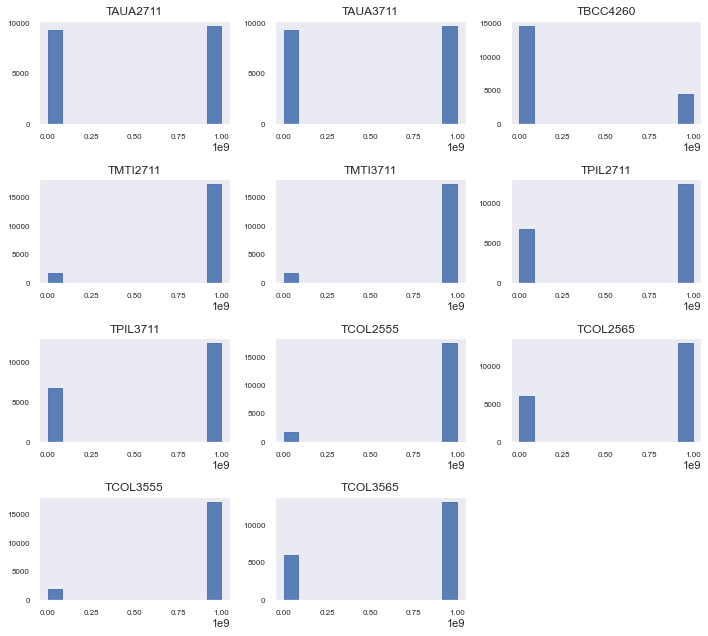

In [90]:
df_credit[['TAUA2711','TAUA3711','TBCC4260','TMTI2711','TMTI3711','TPIL2711','TPIL3711','TCOL2555','TCOL2565','TCOL3555','TCOL3565']].hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

#### Distribution plot of column with trade units

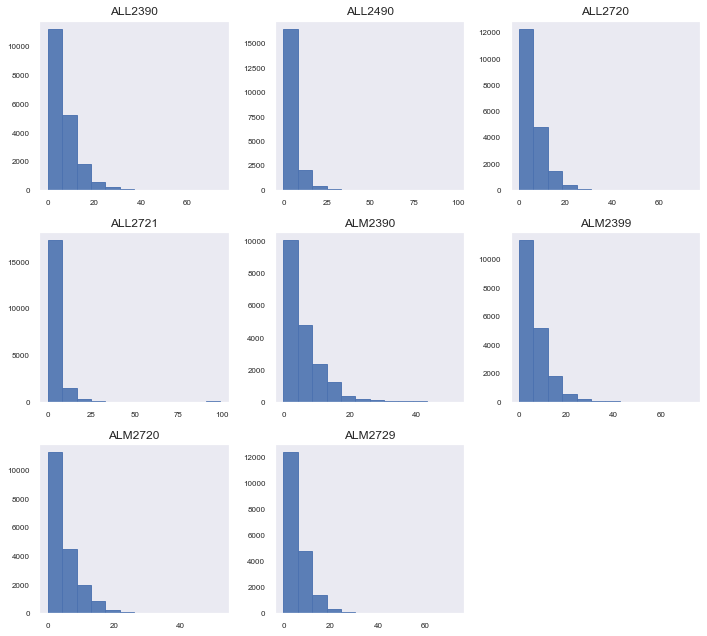

In [95]:
df_credit[['ALL2390','ALL2490','ALL2720','ALL2721','ALM2390','ALM2399','ALM2720','ALM2729']].hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

## Visualization of the categoric distribution

In [12]:
df_NP = data[['NP','product_term_credit_limit']].groupby('NP').count()
df_NP

,product_term_credit_limit
NP,
0,17305
1,1725


In [13]:
df_credit.portfolio_id.unique()
#2019-08 to 2021-05

array([1908, 1909, 1910, 1912, 2001, 2002, 2003, 2006, 2007, 2008, 2009,
       2011, 2012, 2102, 2103, 2104, 2105], dtype=int64)

In [14]:
df_credit.product_term_credit_limit.unique()

array([ 500, 1000,  750,  300], dtype=int64)

In [15]:
df_credit.NP.value_counts()

0    17305
1     1725
Name: NP, dtype: int64

In [16]:
df_credit.cash_intent.value_counts()

0    15678
1     3352
Name: cash_intent, dtype: int64

In [17]:
Nfraud = df_credit[df_credit['NP'] == 0]
fraud = df_credit[df_credit['NP'] == 1]

outlier_fraction  = len(Nfraud)/float(len(fraud))
print(outlier_fraction)

print('Non Fraud transactions: {}'.format(len(Nfraud)))
print('Fraud transactions: {}'.format(len(fraud)))

10.031884057971014
Non Fraud transactions: 17305
Fraud transactions: 1725


In [65]:
cc_Data = df_credit.copy()

In [66]:
cc_Data['portfolio_id'] = '20' + cc_Data['portfolio_id'].astype(str)

In [67]:
cc_Data['portfolio_id'] = pd.to_datetime(cc_Data['portfolio_id'], format='%Y%m')
cc_Data.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,2019-08-01,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-08-01,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,2019-08-01,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-08-01,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,2019-08-01,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [68]:
# Dropping columns where there are 100% missing values. Clearly these columns are not useful for the analysis.
master = cc_Data.dropna(axis='columns',how='all')

In [69]:
round(100*master.groupby('NP').size()/len(master),2)

NP
0    90.94
1     9.06
dtype: float64

In [70]:
round(100*master.groupby('cash_intent').size()/len(master),2)

cash_intent
0    82.39
1    17.61
dtype: float64

In [71]:
master['issue_yr']=master['portfolio_id'].dt.year
master['issue_month']=master['portfolio_id'].dt.month
master['Quarter']=master['portfolio_id'].dt.quarter

In [72]:
Nfraud = master[master['NP'] == 0]
fraud = master[master['NP'] == 1]

Few columns belonging to credit bureau attributes with units of Flag and Rank have been included in the categorical data

In [81]:
categorical_data = master[['issue_yr','issue_month','Quarter','product_term_credit_limit','NP','cash_intent','ALL9950','ALL9951','ALL6310', 'ALL6320','MTF6326']].copy()

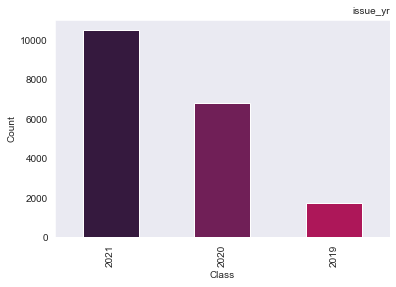

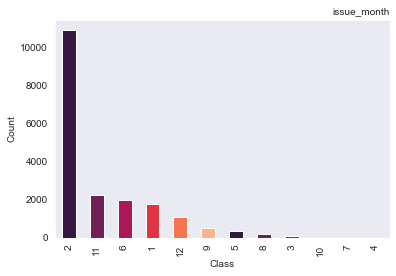

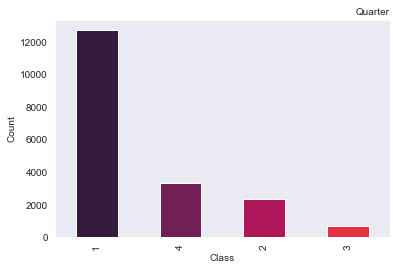

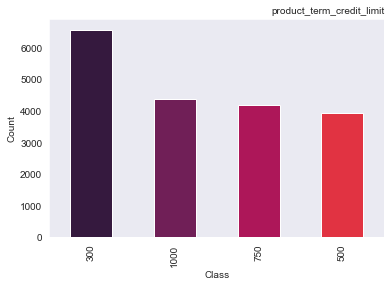

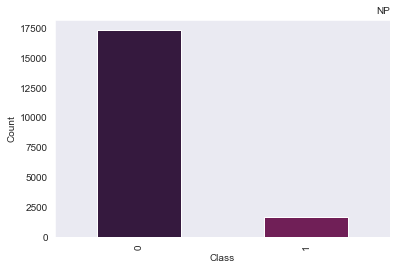

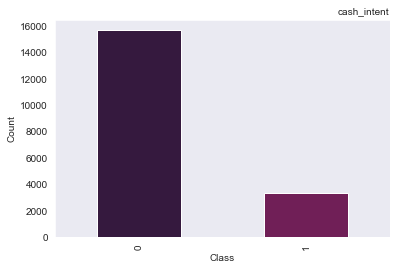

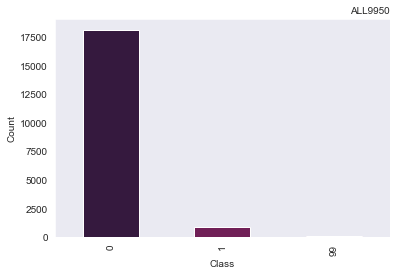

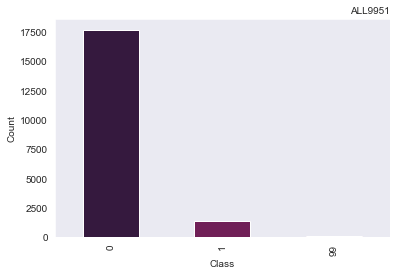

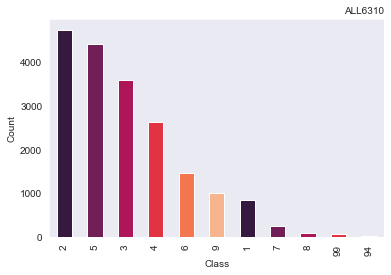

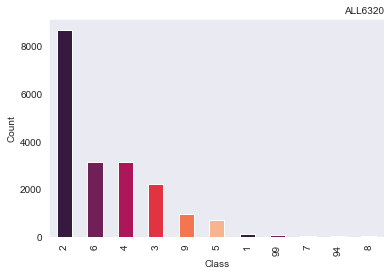

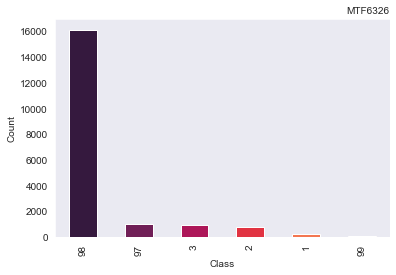

In [82]:
for col in categorical_data.columns:
    categorical_data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

<AxesSubplot:>

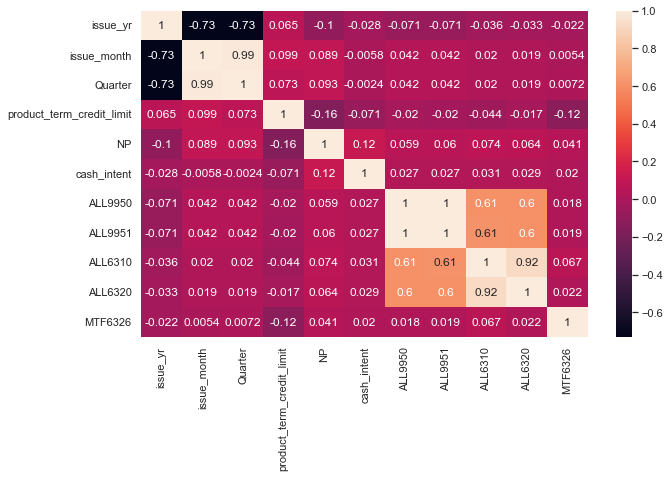

In [86]:
correlation = categorical_data.corr()
sns.set(rc={"figure.figsize":(10, 6)}) 
sns.heatmap(correlation, xticklabels =  correlation.columns, yticklabels = correlation.columns, annot= True)

### Analysis of Fraud applicants

In [29]:
round(100*fraud.groupby('issue_yr').size()/len(fraud),2).reset_index(name='fraud_percent').sort_values('fraud_percent',ascending=False)

,issue_yr,fraud_percent
2,2021,43.83
1,2020,37.62
0,2019,18.55


In [30]:
round(100*Nfraud.groupby('issue_yr').size()/len(Nfraud),2).reset_index(name='Nfraud_percent').sort_values('Nfraud_percent',ascending=False)

,issue_yr,Nfraud_percent
2,2021,56.34
1,2020,35.56
0,2019,8.10


In [31]:
# fraud by quarter, 4th quarter tops
round(100*fraud.groupby(['Quarter']).size()/len(fraud),2).reset_index(name='fraud_percent').sort_values('fraud_percent',ascending=False)

,Quarter,fraud_percent
0,1,45.45
1,2,27.19
3,4,23.54
2,3,3.83


In [32]:
round(100*Nfraud.groupby(['Quarter']).size()/len(Nfraud),2).reset_index(name='Nfraud_percent').sort_values('Nfraud_percent',ascending=False)

,Quarter,Nfraud_percent
0,1,68.96
3,4,16.71
1,2,10.67
2,3,3.66


In [33]:
# Fraud by year and quarter, all year
round(100*fraud.groupby(['issue_yr','Quarter']).size()/len(fraud),2).reset_index(name='percent').sort_values(['percent','Quarter'],ascending=False)

,issue_yr,Quarter,percent
6,2021,1,24.29
2,2020,1,21.16
7,2021,2,19.54
1,2019,4,15.13
5,2020,4,8.41
3,2020,2,7.65
0,2019,3,3.42
4,2020,3,0.41


## Univariate analysis with respect to Paid vs Not Paid Accounts

In [34]:
# displaying frequencies of each category
fraud['product_term_credit_limit'].value_counts()

300     985
500     389
1000    191
750     160
Name: product_term_credit_limit, dtype: int64

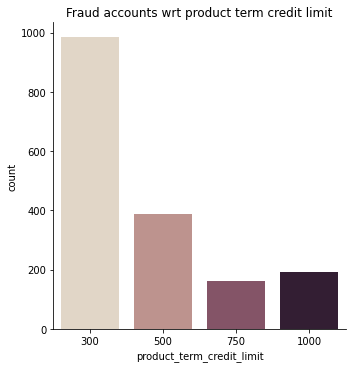

In [35]:
sns.catplot(x="product_term_credit_limit", kind="count", palette="ch:.25", data=fraud).set(title="Fraud accounts wrt product term credit limit")

In [36]:
grouped1 = fraud.groupby(['product_term_credit_limit'])
size1 = grouped1.size()

grouped_NF = Nfraud.groupby(['product_term_credit_limit'])
size_NF = grouped_NF.size()

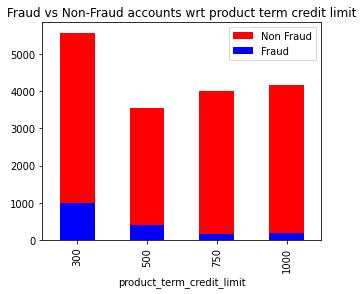

In [37]:
size_NF.plot(subplots=True, kind='bar',color = 'r', figsize= (5,4), label = "Non Fraud")
size1.plot(subplots=True,kind='bar',color = 'b', figsize= (5,4), label = "Fraud")
plt.title('Fraud vs Non-Fraud accounts wrt product term credit limit')
plt.legend()

In [38]:
grouped1 = fraud.groupby(['cash_intent'])
size_F_cash_intent = grouped1.size()

grouped_NF = Nfraud.groupby(['cash_intent'])
size_NF_cash_intent = grouped_NF.size()

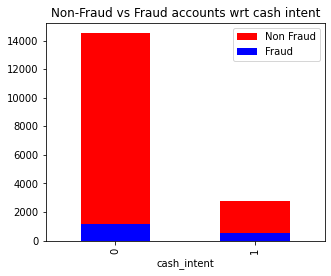

In [39]:
size_NF_cash_intent.plot(subplots=True, kind='bar',color = 'r', figsize= (5,4), label = "Non Fraud")
size_F_cash_intent.plot(subplots=True,kind='bar',color = 'b', figsize= (5,4), label = "Fraud")
plt.title('Non-Fraud vs Fraud accounts wrt cash intent')
plt.legend()

In [40]:
N_fraud = df_credit[df_credit['NP'] == 0]
Fraud = df_credit[df_credit['NP'] == 1]

cc_Nfraud_Data = N_fraud.copy()
cc_fraud_Data = Fraud.copy()

In [41]:
#Fraud data
cc_fraud_Data['portfolio_id'] = '20' + cc_fraud_Data['portfolio_id'].astype(str)

In [42]:
cc_fraud_Data['portfolio_id'] = pd.to_datetime(cc_fraud_Data['portfolio_id'], format='%Y%m')

In [43]:
#Extracting Year
cc_fraud_Data['year'] = cc_fraud_Data['portfolio_id'].dt.year

#Extracting Month
cc_fraud_Data['month'] = cc_fraud_Data['portfolio_id'].dt.month

#Extracting Month
cc_fraud_Data['week'] = cc_fraud_Data['portfolio_id'].dt.isocalendar().week

#Extracting day of week
cc_fraud_Data['dayofweek'] = cc_fraud_Data['portfolio_id'].dt.dayofweek

In [44]:
cc_Nfraud_Data['portfolio_id'] = '20' + cc_Nfraud_Data['portfolio_id'].astype(str)
cc_Nfraud_Data['portfolio_id'] = pd.to_datetime(cc_Nfraud_Data['portfolio_id'], format='%Y%m')

In [45]:
#Extracting Year
cc_Nfraud_Data['year'] = cc_Nfraud_Data['portfolio_id'].dt.year

#Extracting Month
cc_Nfraud_Data['month'] = cc_Nfraud_Data['portfolio_id'].dt.month

#Extracting Month
cc_Nfraud_Data['week'] = cc_Nfraud_Data['portfolio_id'].dt.isocalendar().week

#Extracting day of week
cc_Nfraud_Data['dayofweek'] = cc_Nfraud_Data['portfolio_id'].dt.dayofweek

In [46]:
grouped_fraud = cc_fraud_Data.groupby(['year'])
grouped_Nfraud = cc_Nfraud_Data.groupby(['year'])

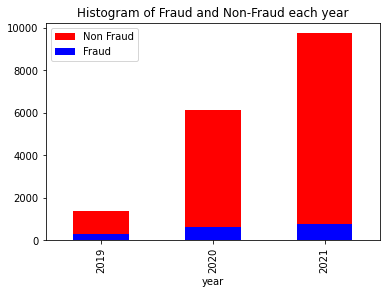

In [47]:
size_N = grouped_Nfraud.size()
size_f = grouped_fraud.size()
size_N.plot(subplots=True, color = 'r',kind='bar', label = "Non Fraud")
size_f.plot(subplots=True, color = 'b',kind='bar', label = "Fraud")

plt.title("Histogram of Fraud and Non-Fraud each year")
plt.legend()

In [48]:
grouped_fraud = cc_fraud_Data.groupby(['month'])
grouped_Nfraud = cc_Nfraud_Data.groupby(['month'])

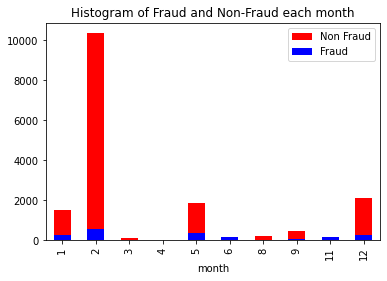

In [49]:
size_N = grouped_Nfraud.size()
size_f = grouped_fraud.size()
size_N.plot(subplots=True, color = 'r',kind='bar', label = "Non Fraud")
size_f.plot(subplots=True, color = 'b',kind='bar', label = "Fraud")

plt.title("Histogram of Fraud and Non-Fraud each month")
plt.legend()